In [66]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [67]:
df = pd.read_csv('database/student_performance_cleaned.csv') 

In [68]:
df.shape

(11790, 16)

In [69]:
df.head()

,studyhours,attendance,resources,extracurricular,motivation,internet,gender,age,learningstyle,onlinecourses,discussions,assignmentcompletion,examscore,edutech,stresslevel,finalgrade
0,19,64,Some,No,Low,Yes,Male,19,Auditory,8,Often,59,40,No,Medium,Excellent
1,19,64,Some,No,Low,Yes,Male,23,Kinesthetic,16,Rarely,90,66,No,Medium,Good
2,19,64,Some,No,Low,Yes,Male,28,Visual,19,Rarely,67,99,Yes,Medium,Fail
3,19,64,Some,Yes,Low,Yes,Male,19,Auditory,8,Often,59,40,No,Medium,Excellent
4,19,64,Some,Yes,Low,Yes,Male,23,Kinesthetic,16,Rarely,90,66,No,Medium,Good


In [70]:
df.tail()

,studyhours,attendance,resources,extracurricular,motivation,internet,gender,age,learningstyle,onlinecourses,discussions,assignmentcompletion,examscore,edutech,stresslevel,finalgrade
11785,30,62,Some,Yes,Medium,Yes,Male,22,Auditory,2,Often,100,71,Yes,High,Average
11786,30,62,Some,Yes,Medium,Yes,Male,23,Kinesthetic,12,Often,72,55,Yes,Medium,Good
11787,22,90,Many,No,Medium,Yes,Male,23,Kinesthetic,0,Often,80,56,No,Low,Good
11788,22,90,Many,No,Medium,Yes,Male,29,Auditory,16,Rarely,50,62,Yes,High,Good
11789,10,86,Many,Yes,High,Yes,Male,18,Auditory,8,Often,66,77,Yes,High,Average


In [71]:
#Resetting the Index to include studyhours
df = df.reset_index()

print("Summary of Data Frame\n")
df.info()


Summary of Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 11790 non-null  int64 
 1   studyhours            11790 non-null  int64 
 2   attendance            11790 non-null  int64 
 3   resources             11790 non-null  object
 4   extracurricular       11790 non-null  object
 5   motivation            11790 non-null  object
 6   internet              11790 non-null  object
 7   gender                11790 non-null  object
 8   age                   11790 non-null  int64 
 9   learningstyle         11790 non-null  object
 10  onlinecourses         11790 non-null  int64 
 11  discussions           11790 non-null  object
 12  assignmentcompletion  11790 non-null  int64 
 13  examscore             11790 non-null  int64 
 14  edutech               11790 non-null  object
 15  stresslevel  

In [72]:
print("No. of Unique Values for Each Attribute\n")
df.nunique()

No. of Unique Values for Each Attribute



index                   11790
studyhours                 32
attendance                 41
resources                   2
extracurricular             2
motivation                  3
internet                    2
gender                      2
age                        12
learningstyle               3
onlinecourses              21
discussions                 2
assignmentcompletion       51
examscore                  61
edutech                     2
stresslevel                 3
finalgrade                  4
dtype: int64

In [73]:
print("No. of Null Values per Attribute\n")
df.isnull().sum()

No. of Null Values per Attribute



index                   0
studyhours              0
attendance              0
resources               0
extracurricular         0
motivation              0
internet                0
gender                  0
age                     0
learningstyle           0
onlinecourses           0
discussions             0
assignmentcompletion    0
examscore               0
edutech                 0
stresslevel             0
finalgrade              0
dtype: int64

In [74]:
df

,index,studyhours,attendance,resources,extracurricular,motivation,internet,gender,age,learningstyle,onlinecourses,discussions,assignmentcompletion,examscore,edutech,stresslevel,finalgrade
0,0,19,64,Some,No,Low,Yes,Male,19,Auditory,8,Often,59,40,No,Medium,Excellent
1,1,19,64,Some,No,Low,Yes,Male,23,Kinesthetic,16,Rarely,90,66,No,Medium,Good
2,2,19,64,Some,No,Low,Yes,Male,28,Visual,19,Rarely,67,99,Yes,Medium,Fail
3,3,19,64,Some,Yes,Low,Yes,Male,19,Auditory,8,Often,59,40,No,Medium,Excellent
4,4,19,64,Some,Yes,Low,Yes,Male,23,Kinesthetic,16,Rarely,90,66,No,Medium,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11785,11785,30,62,Some,Yes,Medium,Yes,Male,22,Auditory,2,Often,100,71,Yes,High,Average
11786,11786,30,62,Some,Yes,Medium,Yes,Male,23,Kinesthetic,12,Often,72,55,Yes,Medium,Good
11787,11787,22,90,Many,No,Medium,Yes,Male,23,Kinesthetic,0,Often,80,56,No,Low,Good
11788,11788,22,90,Many,No,Medium,Yes,Male,29,Auditory,16,Rarely,50,62,Yes,High,Good


In [75]:
#Statistics Summary of Data Belonging to Numeric Datatype
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
index,11790.0,5894.500000,3403.624171,0.0,2947.25,5894.5,8841.75,11789.0
studyhours,11790.0,19.940543,6.041473,5.0,16.00,20.0,24.00,36.0
attendance,11790.0,80.279304,11.479439,60.0,70.00,80.0,90.00,100.0
age,11790.0,23.521883,3.506763,18.0,20.00,24.0,27.00,29.0
onlinecourses,11790.0,9.872180,6.116135,0.0,5.00,10.0,15.00,20.0
assignmentcompletion,11790.0,74.499321,14.646308,50.0,62.00,74.0,87.00,100.0
examscore,11790.0,70.359033,17.681159,40.0,55.00,70.0,86.00,100.0


In [76]:
#Statistics Summary of Data for All
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,11790.0,NaN,NaN,NaN,5894.5,3403.624171,0.0,2947.25,5894.5,8841.75,11789.0
studyhours,11790.0,NaN,NaN,NaN,19.940543,6.041473,5.0,16.0,20.0,24.0,36.0
attendance,11790.0,NaN,NaN,NaN,80.279304,11.479439,60.0,70.0,80.0,90.0,100.0
resources,11790,2,Some,7959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extracurricular,11790,2,Yes,6836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motivation,11790,3,Medium,5682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet,11790,2,Yes,10760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,11790,2,Female,6320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,11790.0,NaN,NaN,NaN,23.521883,3.506763,18.0,20.0,24.0,27.0,29.0
learningstyle,11790,3,Visual,5845,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#Identify Categorical and Numerical Data

# Get numeric columns
num_cols = df.select_dtypes(include="number").columns.tolist()

# Remove the index column if it exists
if "index" in num_cols:
    num_cols.remove("index")

# Get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print results
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables (index removed):")
print(num_cols)



Categorical Variables:
['resources', 'extracurricular', 'motivation', 'internet', 'gender', 'learningstyle', 'discussions', 'edutech', 'stresslevel', 'finalgrade']
Numerical Variables (index removed):
['studyhours', 'attendance', 'age', 'onlinecourses', 'assignmentcompletion', 'examscore']


studyhours
Skew:  0.02


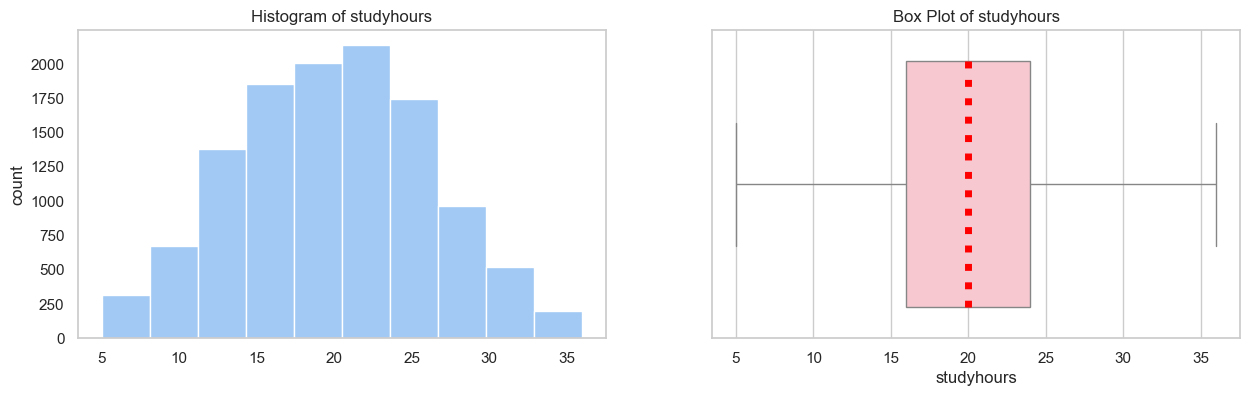

attendance
Skew:  -0.02


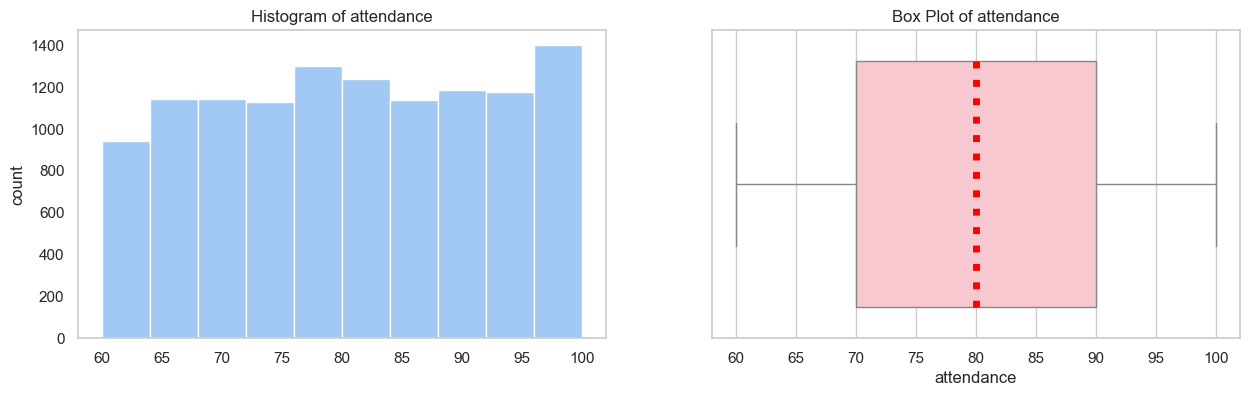

age
Skew:  -0.01


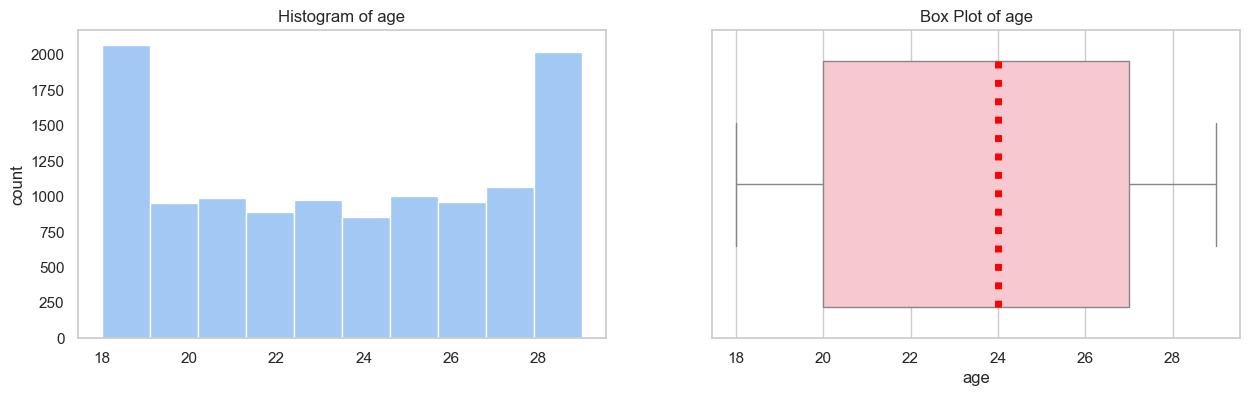

onlinecourses
Skew:  0.03


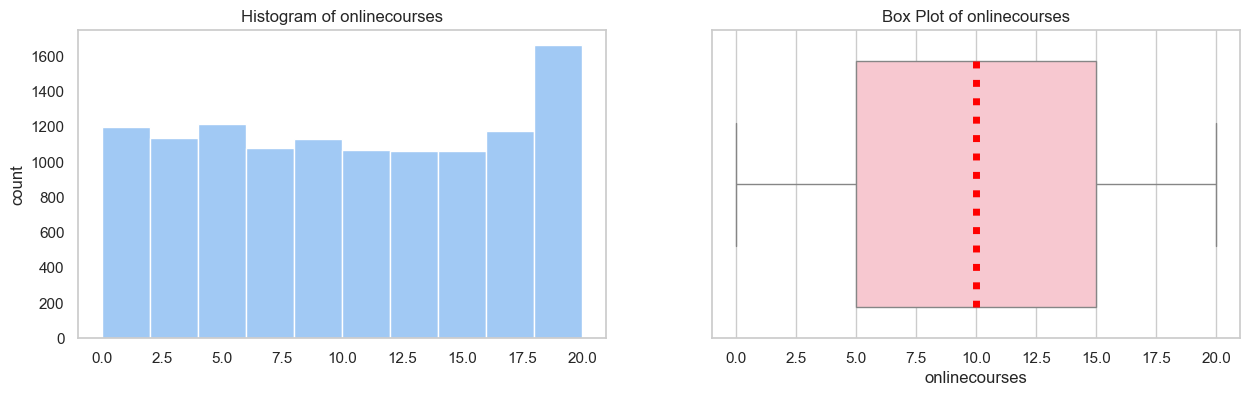

assignmentcompletion
Skew:  0.05


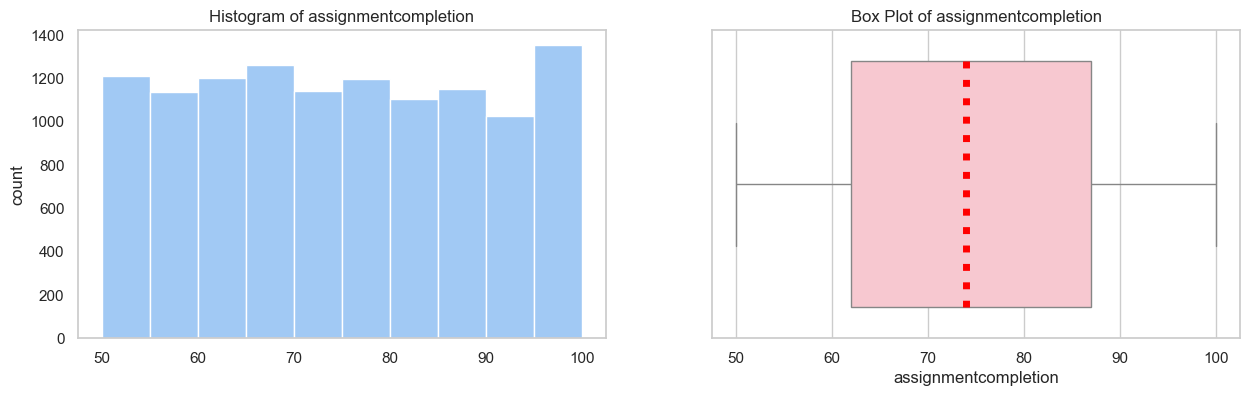

examscore
Skew:  -0.02


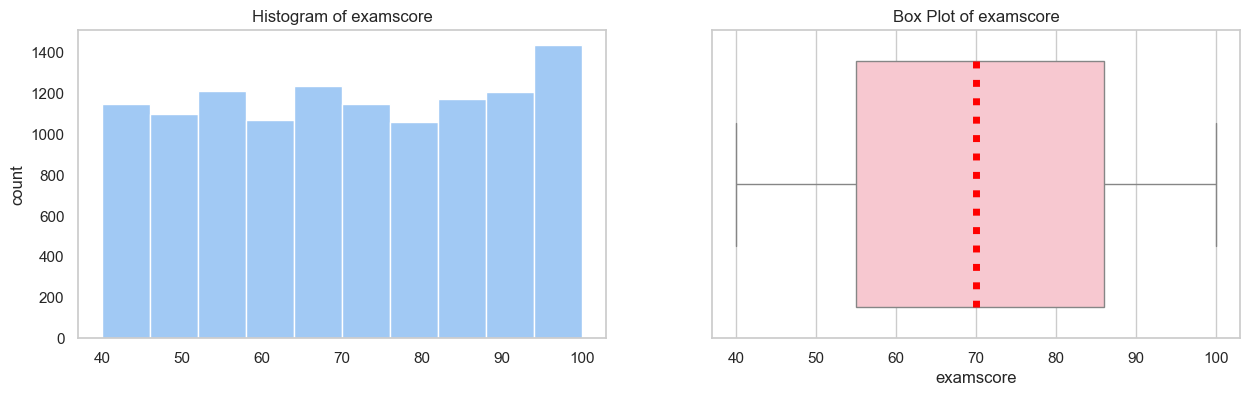

In [103]:
# ==== Univairate Analysis ====
# Numeric

# Set Visual Style
sns.set(style="whitegrid", palette="pastel")

for col in num_cols:
    print(col)
    print('Skew: ', round(df[col].skew(),2))
    plt.figure(figsize = (15,4))

    # Histogram
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.title(f"Histogram of {col}")

    # Box Plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color = 'pink', medianprops={'color':'red', 'ls': ':', 'lw':5})
    plt.title(f"Box Plot of {col}")
    
    plt.show()

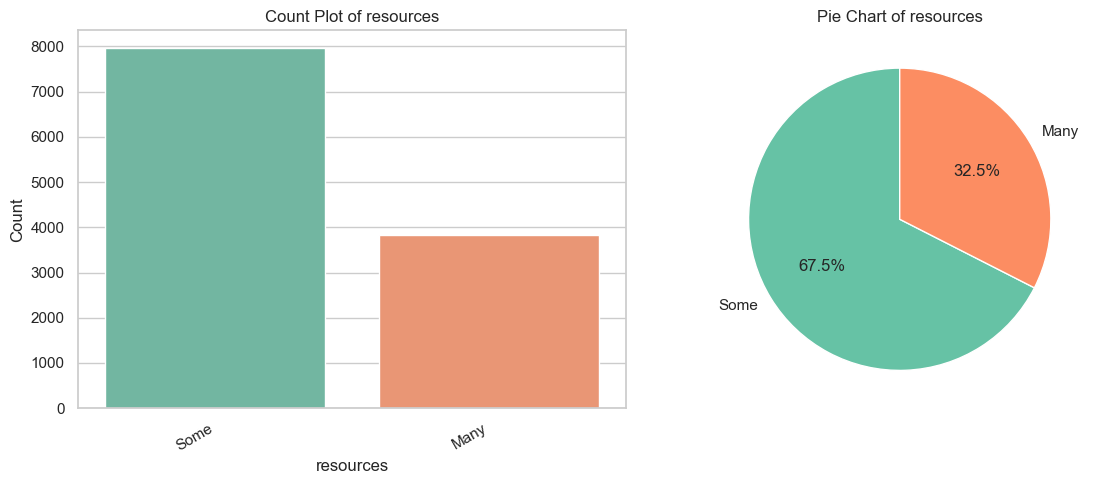

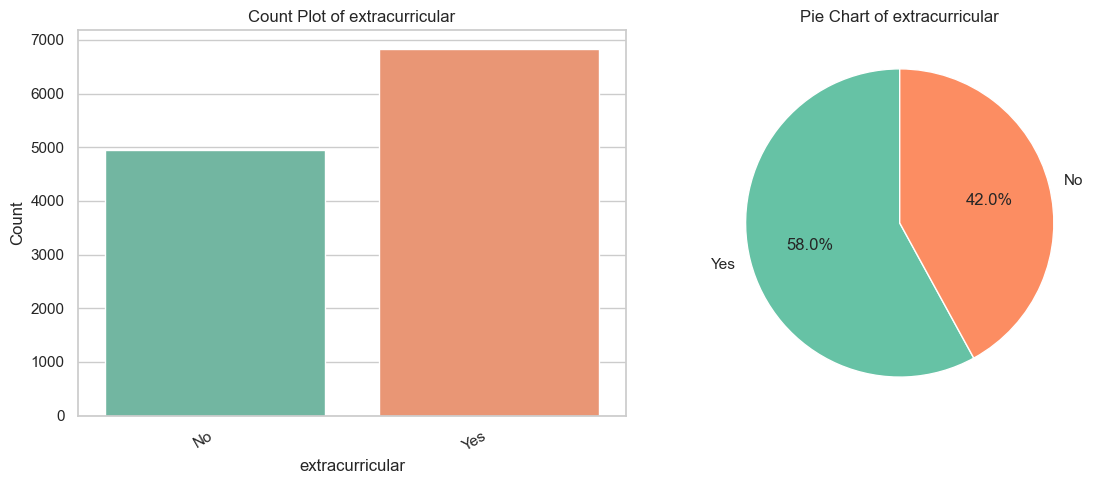

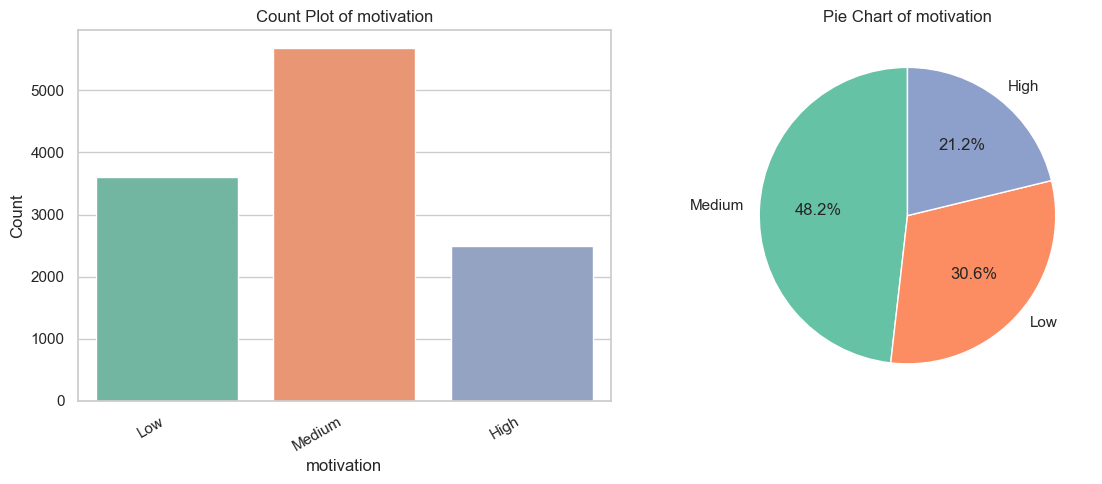

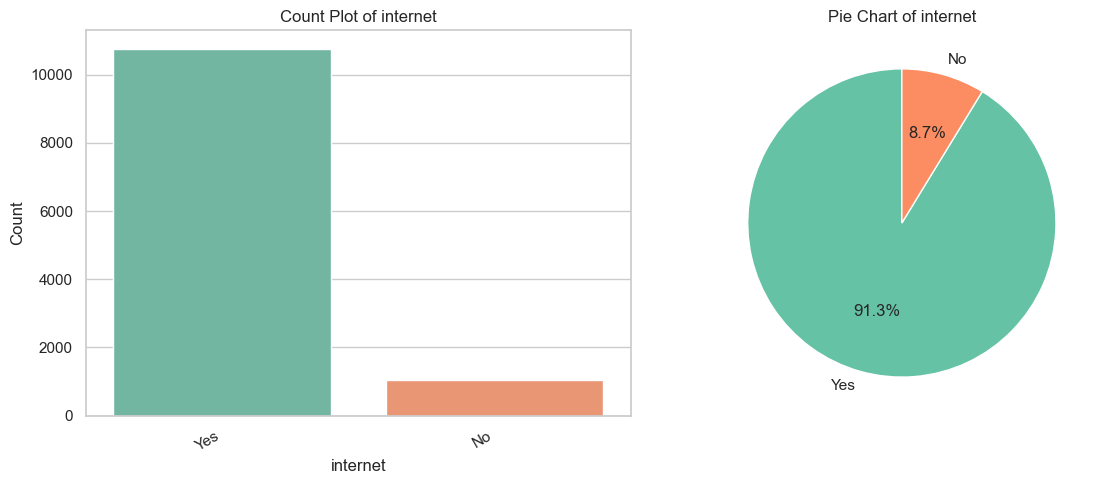

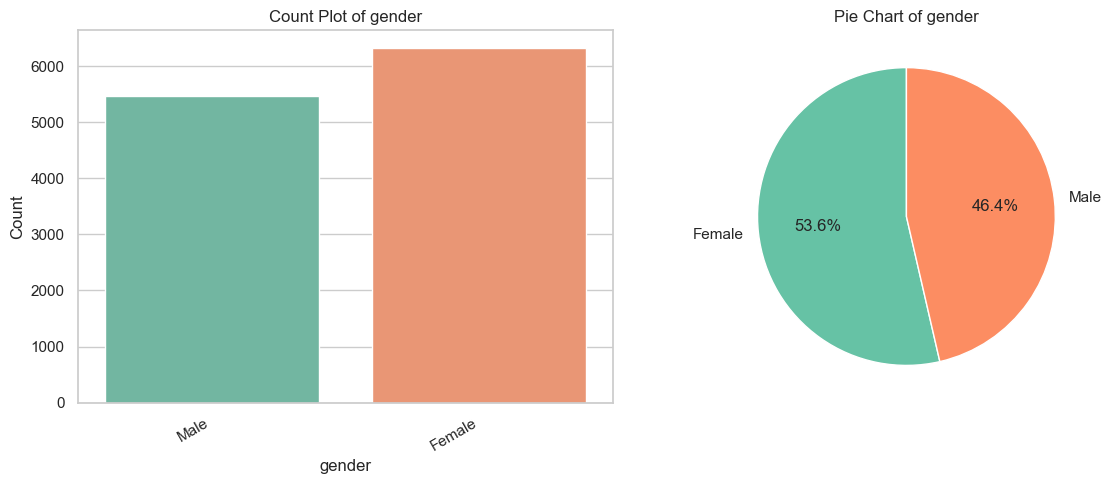

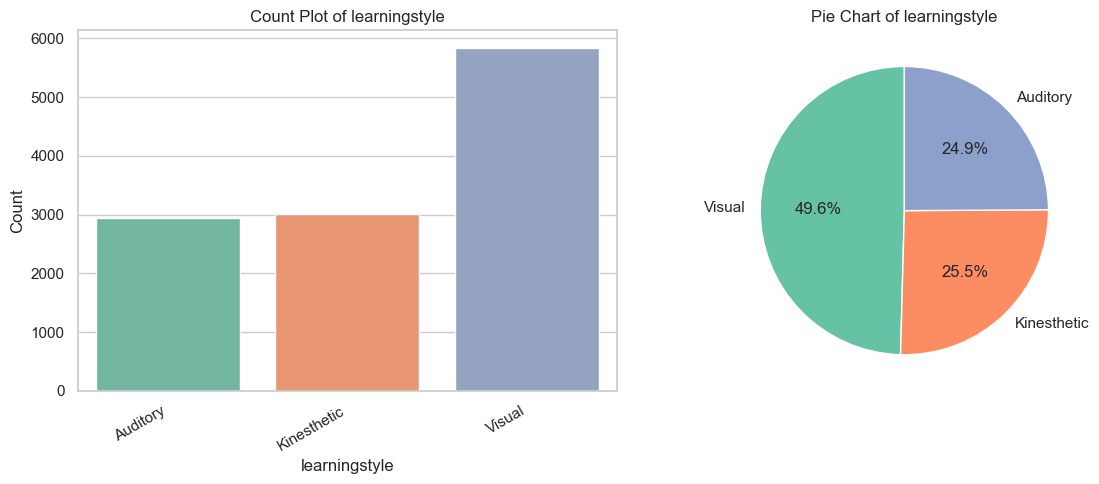

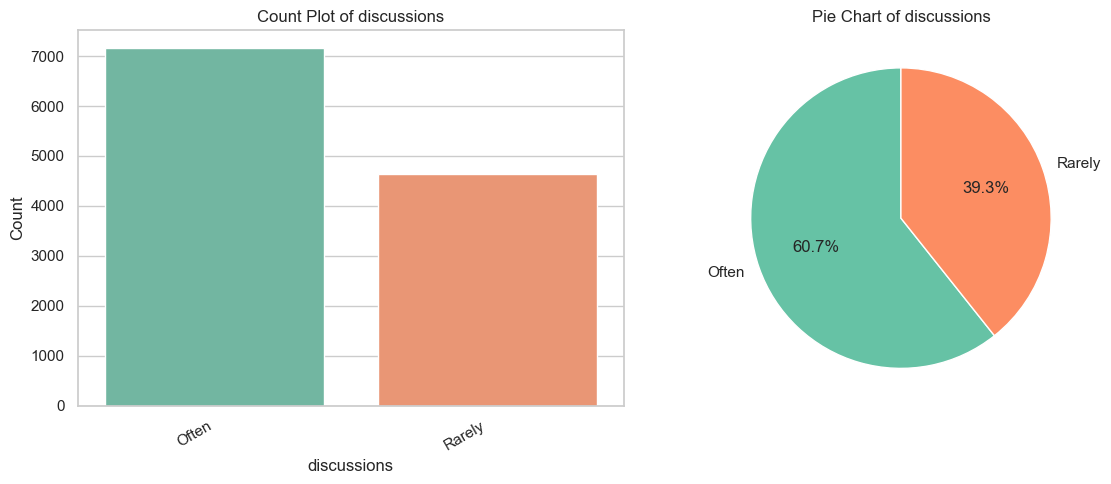

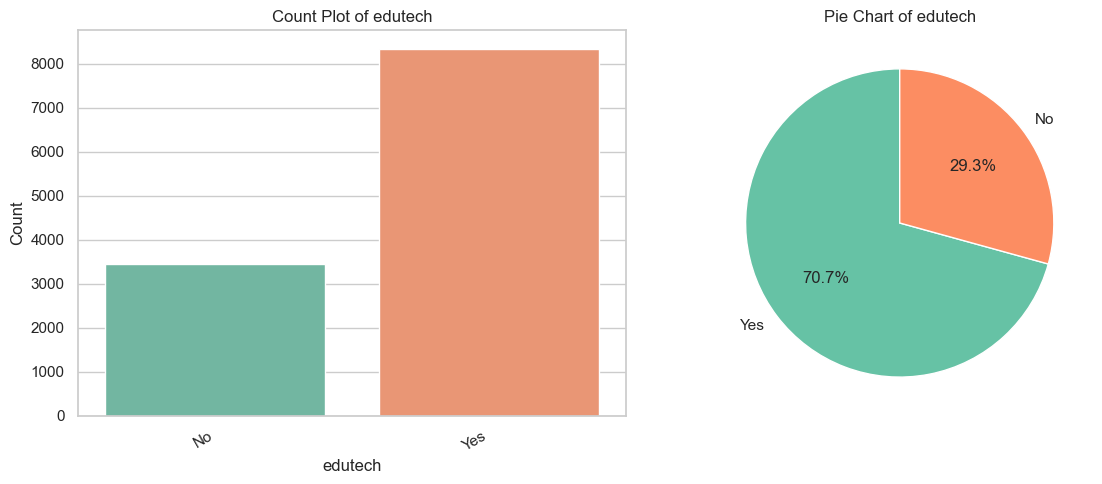

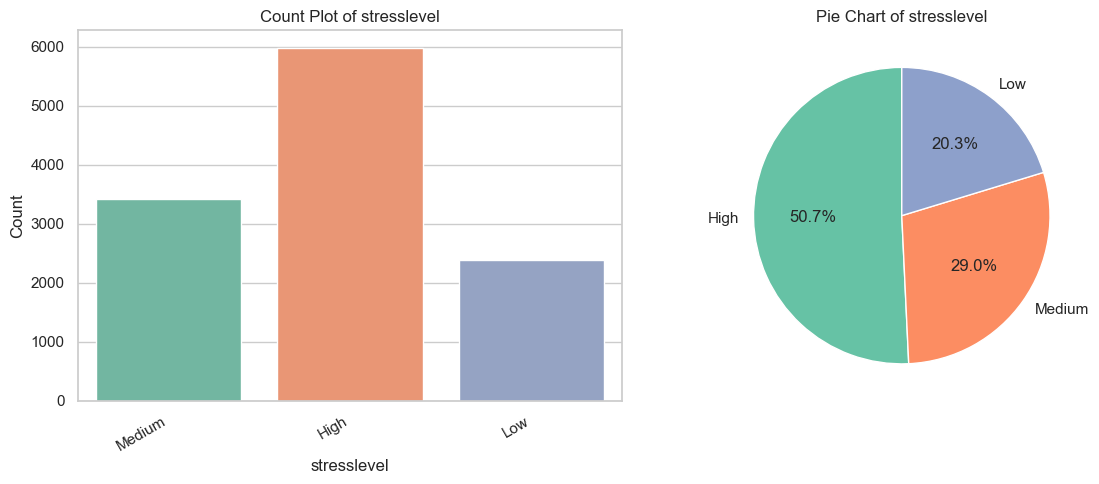

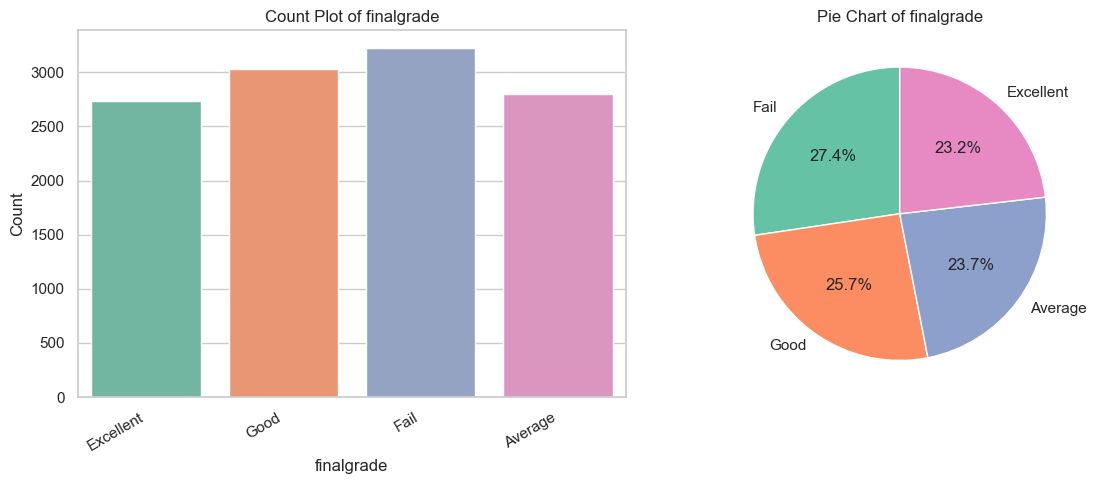

In [104]:
# ===- Univairate Analysis ====
# Categorical

sns.set(style="whitegrid", palette="pastel")

# Loop through each categorical column
for col in cat_cols:
    plt.figure(figsize=(12, 5))

    # Bar Plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha='right')

    # Pie Chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")  # Hide y-label

    plt.tight_layout()
    plt.show()